### Importação dos dados



In [41]:
import pandas as pd
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)


In [ ]:
# Verificar os dados

print(loja1.head())
print(loja2.head())
print(loja3.head())
print(loja4.head())


In [46]:
# Dicionario com as lojas

lojas = {
    'Loja 1': loja1,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

#1. Análise do faturamento


In [85]:
print("📊 FATURAMENTO TOTAL:\n")
faturamentos = {}
for nome, loja in lojas.items():
  loja['Faturamento'] = loja['Preço']
  total = loja['Faturamento'].sum()
  faturamentos[nome] = total
  print(f'{nome}: R${total:,.2f}')

📊 FATURAMENTO TOTAL:

Loja 1: R$1,534,509.12
Loja 2: R$1,488,459.06
Loja 3: R$1,464,025.03
Loja 4: R$1,384,497.58


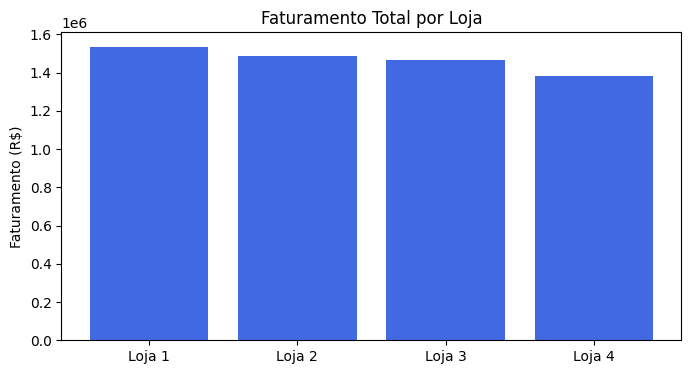

In [92]:
plt.figure(figsize=(8, 4))
plt.bar(faturamentos.keys(), faturamentos.values(), color='royalblue')
plt.title("Faturamento Total por Loja")
plt.ylabel("Faturamento (R$)")
plt.show()

# 2. Vendas por Categoria


In [86]:
print("📦 VENDAS POR CATEGORIA:\n")
for nome, loja in lojas.items():
    categorias = loja['Categoria do Produto'].value_counts()
    print(f"{nome}:")
    print(categorias.to_string())
    print()


📦 VENDAS POR CATEGORIA:

Loja 1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171

Loja 2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181

Loja 3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177

Loja 4:
Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer          277
eletrodomesticos         254
utilidades dome

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


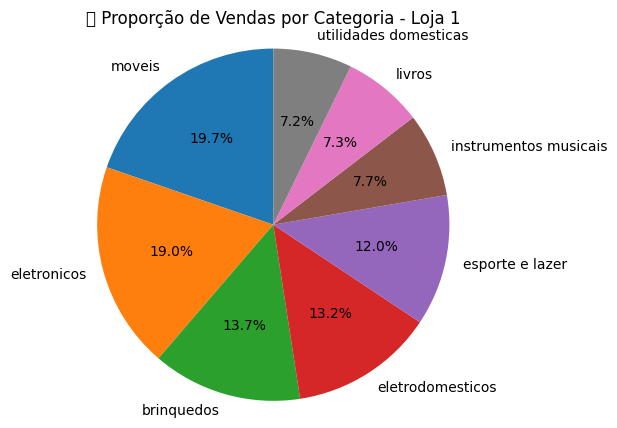

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


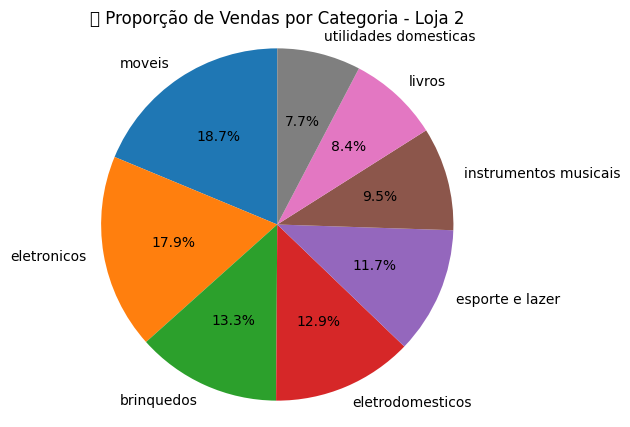

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


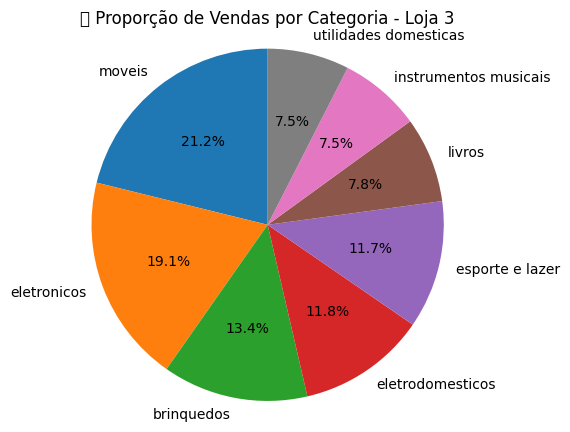

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


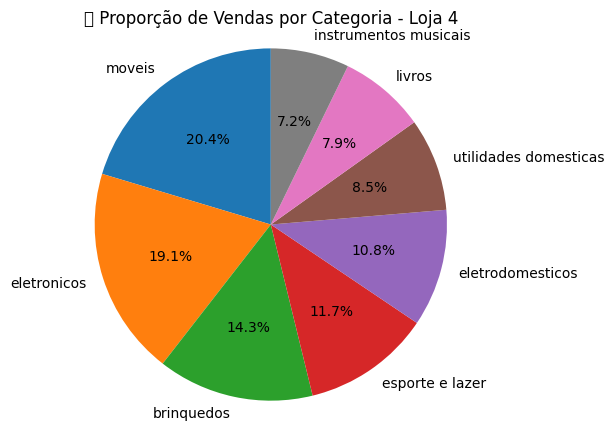

In [93]:
for nome, loja in lojas.items():
    categorias = loja['Categoria do Produto'].value_counts()
    plt.figure(figsize=(5, 5))
    plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"📦 Proporção de Vendas por Categoria - {nome}")
    plt.axis('equal')
    plt.show()

# 3. Média de Avaliação das Lojas

In [87]:
print("\n⭐ MÉDIA DE AVALIAÇÃO:\n")
for nome, loja in lojas.items():
    media = loja['Avaliação da compra'].mean()
    print(f'{nome}: {media:.2f}')


⭐ MÉDIA DE AVALIAÇÃO:

Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


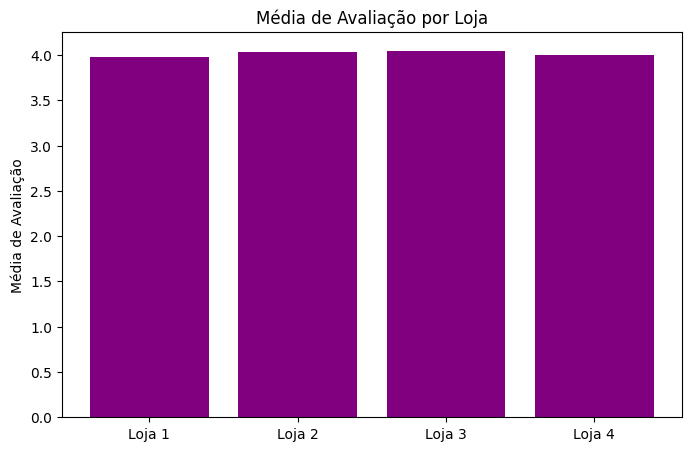

In [89]:
avaliacoes = {nome: loja['Avaliação da compra'].mean() for nome, loja in lojas.items()}
plt.figure(figsize=(8, 5))
plt.bar(avaliacoes.keys(), avaliacoes.values(), color='purple')
plt.title("Média de Avaliação por Loja")
plt.ylabel("Média de Avaliação")
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [84]:
print("📈 PRODUTOS MAIS VENDIDOS:")
for nome, loja in lojas.items():
    mais_vendidos = loja['Produto'].value_counts().head(1)
    produto = mais_vendidos.index[0]
    quantidade = mais_vendidos.iloc[0]
    print(f"{nome}: {produto} - {quantidade} vendas")

print("\nPRODUTOS MENOS VENDIDOS:")
for nome, loja in lojas.items():
    menos_vendidos = loja['Produto'].value_counts(ascending=True).head(1)
    produto = menos_vendidos.index[0]
    quantidade = menos_vendidos.iloc[0]
    print(f"{nome}: {produto} - {quantidade} vendas")


📈 PRODUTOS MAIS VENDIDOS:
Loja 1: Micro-ondas - 60 vendas
Loja 2: Iniciando em programação - 65 vendas
Loja 3: Kit banquetas - 57 vendas
Loja 4: Cama box - 62 vendas

PRODUTOS MENOS VENDIDOS:
Loja 1: Headset - 33 vendas
Loja 2: Jogo de tabuleiro - 32 vendas
Loja 3: Blocos de montar - 35 vendas
Loja 4: Guitarra - 33 vendas


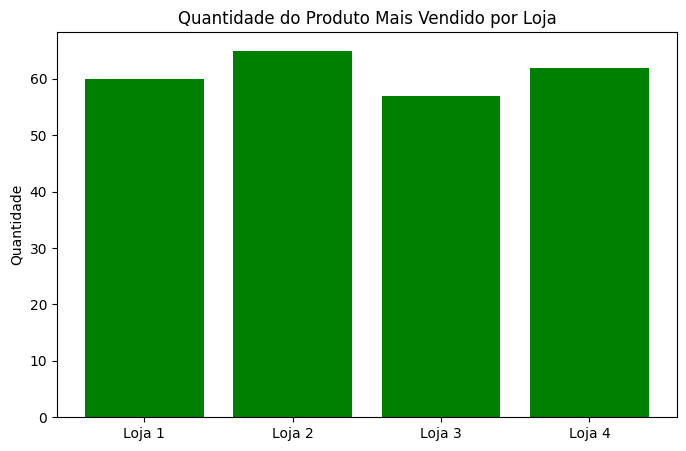

In [88]:
mais_vendidos = {nome: loja['Produto'].value_counts().idxmax() for nome, loja in lojas.items()}
produtos_mais_vendidos = {nome: loja['Produto'].value_counts().max() for nome, loja in lojas.items()}
plt.figure(figsize=(8, 5))
plt.bar(mais_vendidos.keys(), produtos_mais_vendidos.values(), color='green')
plt.title("Quantidade do Produto Mais Vendido por Loja")
plt.ylabel("Quantidade")
plt.show()

# 5. Frete Médio por Loja


In [49]:
print("\n🚚 FRETE MÉDIO:")
for nome, loja in lojas.items():
    frete_medio = loja['Frete'].mean()
    print(f'{nome}: R${frete_medio:.2f}')


🚚 FRETE MÉDIO:
Loja 1: R$34.69
Loja 2: R$33.62
Loja 3: R$33.07
Loja 4: R$31.28


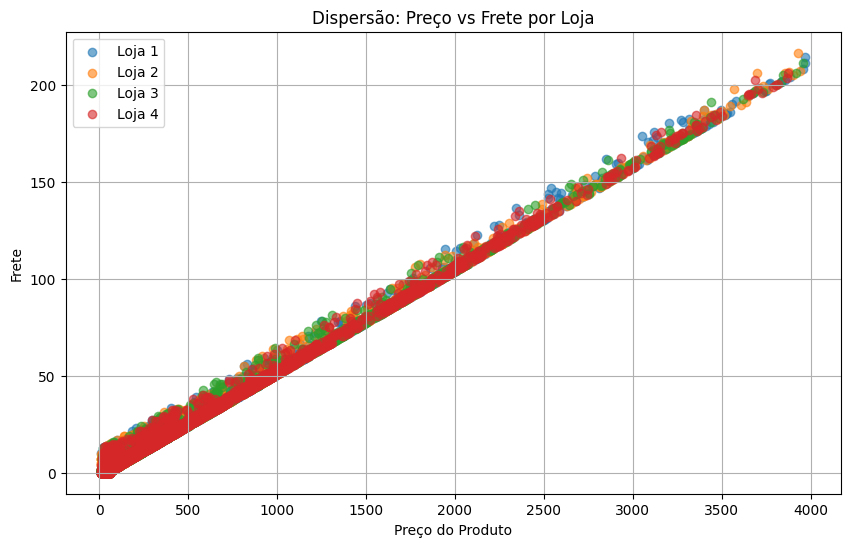

In [94]:
plt.figure(figsize=(10, 6))
for nome, loja in lojas.items():
    plt.scatter(loja['Preço'], loja['Frete'], label=nome, alpha=0.6)

plt.title("Dispersão: Preço vs Frete por Loja")
plt.xlabel("Preço do Produto")
plt.ylabel("Frete")
plt.legend()
plt.grid(True)
plt.show()

Após uma análise detalhada dos indicadores de desempenho das quatro lojas, concluímos que a Loja 4 apresenta os resultados mais fracos em praticamente todos os aspectos avaliados. Ela tem o menor faturamento total, uma avaliação média inferior à das outras lojas, e não se destaca em nenhuma categoria específica de vendas. Embora apresente o frete médio mais baixo, isso não foi suficiente para impulsionar suas vendas ou fidelizar clientes.

Diante disso, recomendamos que o Seu João venda a Loja 4. Essa decisão permitirá focar nas lojas mais lucrativas e bem avaliadas, otimizando recursos e abrindo espaço para novos investimentos com maior potencial de retorno.